In [1]:
from sklearn import datasets

In [2]:
data = datasets.load_digits()

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
import os

In [9]:
import numpy as np

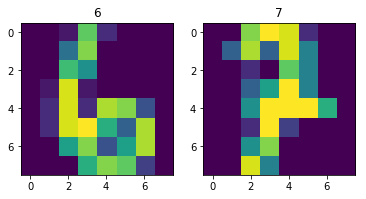

In [19]:
idx1 = np.random.randint(low=0, high=len(data.target))
idx2 = np.random.randint(low=0, high=len(data.target))

plt.figure()
plt.subplot(121)
plt.imshow(data.images[idx1])
plt.title(data.target[idx1])
plt.subplot(122)
plt.imshow(data.images[idx2])
plt.title(data.target[idx2])
plt.show()

if (data.target[idx1]-data.target[idx2])>0:
    os.system('say "Digit 1 is greater than digit 2"')
if (data.target[idx1]-data.target[idx2])<0:
    os.system('say "Digit 2 is greater than digit 1"')
if (data.target[idx1]-data.target[idx2])==0:
    os.system('say "Both digits are equal"')

In [15]:
from brian2 import *

In [16]:
alpha=0.9
start_scope()
network = Network()
digit1 = NeuronGroup(8*8, 'rates: Hz', threshold='rand()<rates*dt')
digit2 = NeuronGroup(8*8, 'rates: Hz', threshold='rand()<rates*dt')
result = NeuronGroup(2, 'rates: Hz', threshold='rand()<rates*dt')
M1 = SpikeMonitor(digit1)
M2 = SpikeMonitor(digit2)
O = SpikeMonitor(result)
network.add(digit1)
network.add(digit2)
network.add(result)
network.add(M1)
network.add(M2)
network.add(O)

for stim in range(10):
    idx1 = np.random.randint(low=0, high=len(data.target))
    idx2 = np.random.randint(low=0, high=len(data.target))
    digit1.rates = 40 * Hz * (alpha * data.images[idx1].flatten()/16 + (1-alpha) * np.random.rand(8*8))
    digit2.rates = 40 * Hz * (alpha * data.images[idx2].flatten()/16 + (1-alpha) * np.random.rand(8*8))
    res = np.array([(data.target[idx1]-data.target[idx2])>=0,
                    (data.target[idx1]-data.target[idx2])<=0])    
    result.rates = 40 * Hz * res
    network.run(1*second, report='text')

Starting simulation at t=0. s for a duration of 1. s
1.0 (100%) simulated in 2s
Starting simulation at t=1. s for a duration of 1. s
1.0 (100%) simulated in < 1s
Starting simulation at t=2. s for a duration of 1. s
1.0 (100%) simulated in < 1s
Starting simulation at t=3. s for a duration of 1. s
1.0 (100%) simulated in < 1s
Starting simulation at t=4. s for a duration of 1. s
1.0 (100%) simulated in < 1s
Starting simulation at t=5. s for a duration of 1. s
1.0 (100%) simulated in < 1s
Starting simulation at t=6. s for a duration of 1. s
1.0 (100%) simulated in < 1s
Starting simulation at t=7. s for a duration of 1. s
1.0 (100%) simulated in < 1s
Starting simulation at t=8. s for a duration of 1. s
1.0 (100%) simulated in < 1s
Starting simulation at t=9. s for a duration of 1. s
1.0 (100%) simulated in < 1s


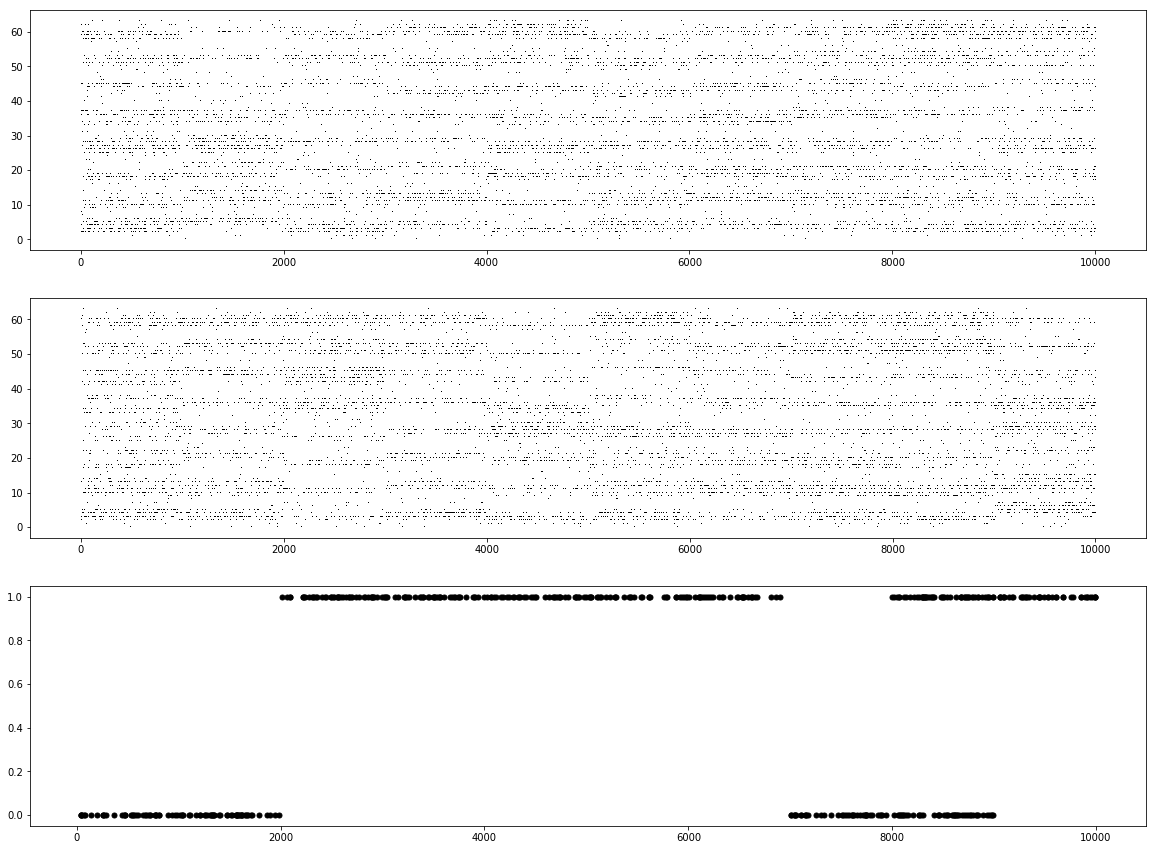

In [17]:
plt.figure(figsize=[20, 15])
subplot(311)
plot(M1.t/ms, M1.i, ',k')
subplot(312)
plot(M2.t/ms, M2.i, ',k')
subplot(313)
plot(O.t/ms, O.i, '.k', markersize=10)
show()